# 04-06 로지스틱 회귀 뉴런으로 단일층 신경망을 만듭니다.
- 앞에서 만든 로지스틱 회귀 뉴런에 몇가지 기능을 추가합니다.

## 경사하강법의 종류
- 확률적 경사 하강법
- 배치 경사 하강법
- 미니 배치 경사 하강법

## 확률적 경사하강법을 적용한 단일 신경망

- 매 에포크마다 훈련 세트의 샘플 순서를 섞는다.
  - 1. 훈련 세트의 순서를 무작위로 변경하는 방법 - 메모리, 시간 낭비
  - 2. 인덱스를 활용하여 훈련 세트를 무작위로 선택하는 방법 (선택)

In [43]:
import numpy as np
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []                                                  # 손실을 저장하는 리스트
    
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b     # 직선의 방정식을 계산
        # z = w1*x1 + w2*x2 ''' wn*xn + b
        return z
    
    def backprop(self, x, err):
        # 가중치와 절편에 대한 그레이디언트를 계산, 반환
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    # 확률적 경사하강법을 적용한 훈련법
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])        # 가중치를 초기화 합니다.
        self.b = 0                          # 절편을 초기화 합니다.
        for i in range(epochs):             # epochs만큼 반복합니다.
            loss = 0                                                      # 손실을 0으로 초기화합니다.
            indexes = np.random.permutation(np.arange(len(x)))            # 확률적 경사하강법을 적용하기 위한 인덱스 섞기
            for i in indexes:
                z = self.forpass(x[i])       # 정방향 계산
                a = self.activiation(z)     # 활성화 함수 적용
                err = -(y[i] - a)            # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                self.w -= w_grad            # 가중치 업데이트
                self.b -= b_grad            # 절편 업데이트

                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다.
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y))
    
    def activiation(self, z):
        z = np.clip(z, -100, None)          # 안전한 np.exp() 계산을 위한 clip함수
        a = 1 / (1 + np.exp(-z))            # 시그모이드 계산
        return a
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]    # 선형 함수 적용
                                                                            # a = self.activiation(np.array(z))       # 활성화 함수를 뺌
        return np.array(z) > 0                  # 계단 함수 적용
    
    def score(self, x, y):                                                  # 성능을 보여주는 메서드
        return np.mean(self.predict(x) == y)                                # predict메서드에 입력 값을 넣고, y값과 비교하여 평균을 낸다.
    

In [44]:
# 궁금한 코드
x = [2,45,12,48,4,65,3,22]
print(np.arange(len(x))) # x의 길이에 해당하는 인덱스들의 값을 저장한 리스트

[0 1 2 3 4 5 6 7]


In [45]:
# 데이터 준비
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

# 훈련 세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

# 단일층 신경망 생성

In [46]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.9298245614035088

# 단일층 신경망의 손실 리스트 그래프그리기

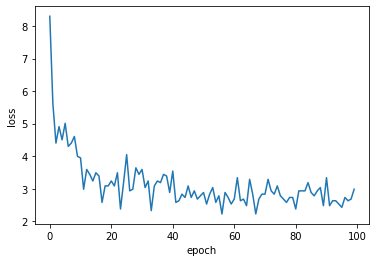

In [47]:
import matplotlib.pyplot as plt
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 04-07 사이킷런으로 로지스틱 회귀를 수행합니다.

In [48]:
from sklearn.linear_model import SGDClassifier

# sgd 분류기 생성
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)

# 모델 훈련
sgd.fit(x_train, y_train)

SGDClassifier(loss='log', max_iter=100, random_state=42)

In [49]:
# 모델 성능 test
sgd.score(x_test, y_test)

0.8333333333333334

In [50]:
# 모델 예측
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])